# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk") # was initially set to poster which makes fonts too large


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
type(boston)

sklearn.utils.Bunch

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
bos_zscore = (bos - bos.mean())/bos.std()
bos_zscore.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.425408e-17,6.319056e-17,-3.145486e-15,-7.021173e-17,2.611876e-15,-1.148313e-14,-1.200621e-15,7.161597e-16,1.123388e-16,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16,-2.864639e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00,-1.906340e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01,-5.988631e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01,-1.449159e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01,2.682577e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00,2.986505e+00


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

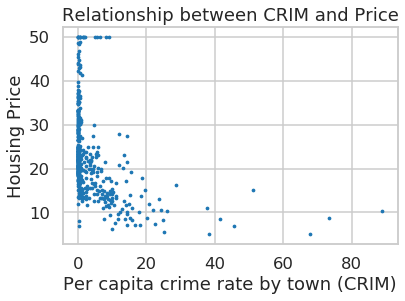

In [14]:
plt.scatter(bos.CRIM, bos.PRICE, s=5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>1) Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>2) Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>3) Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

### 1) Describe relationship
In general, housing price and and per capita crime rate (CRIM) are inversely related. As the crime rate increases the housing price decreases. The relationship between housing price and crime rate is not linear. A small change in crime rate appears to have a larger effect on housing price when the crime rates are small. A few other interesting observations:
1. Max housing price appears to be capped at '50'
2. There seems to be a subset of homes in the >= 50 price group which are not effected by crime rate (or possibly the signal is lost due to the apparent threshold on price)
3. The variation in home price is not constant over the crime rate. In low crime areas houses are expensive and inexpensive. As the crime rate increases the variability in price decreases.

It does seem that there are some outliers - very high crime rates and >500k house prices.

### 2) RM and PTRATIO scatter plots

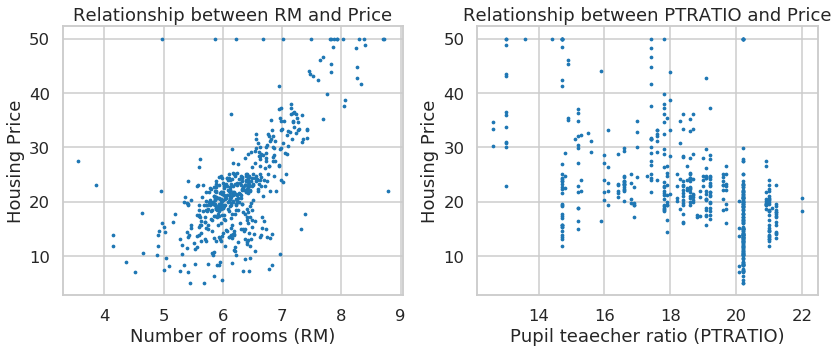

In [15]:
plt.subplots(1,2,figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(bos.RM, bos.PRICE, s=5)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

plt.subplot(1, 2, 2)
plt.scatter(bos.PTRATIO, bos.PRICE, s=5)
plt.xlabel("Pupil teaecher ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.tight_layout()
plt.show()

Average rooms per dwelling (RM) and price are positively correlated. There are a some outliers, but the for the most part the relationship is linear. 

Pupil-teacher ratio by town (PTRATIO) is anticorrelated with housing price. As the pupil-teacher ratio increases, the housing price appears to fall somewhat. The correlation is not as strong as that observed with average rooms per dwelling. 

These two factors could be interesting to include in the model because they both appear correlated with the target variable but in opposite directions.

### 3) Other features of interest

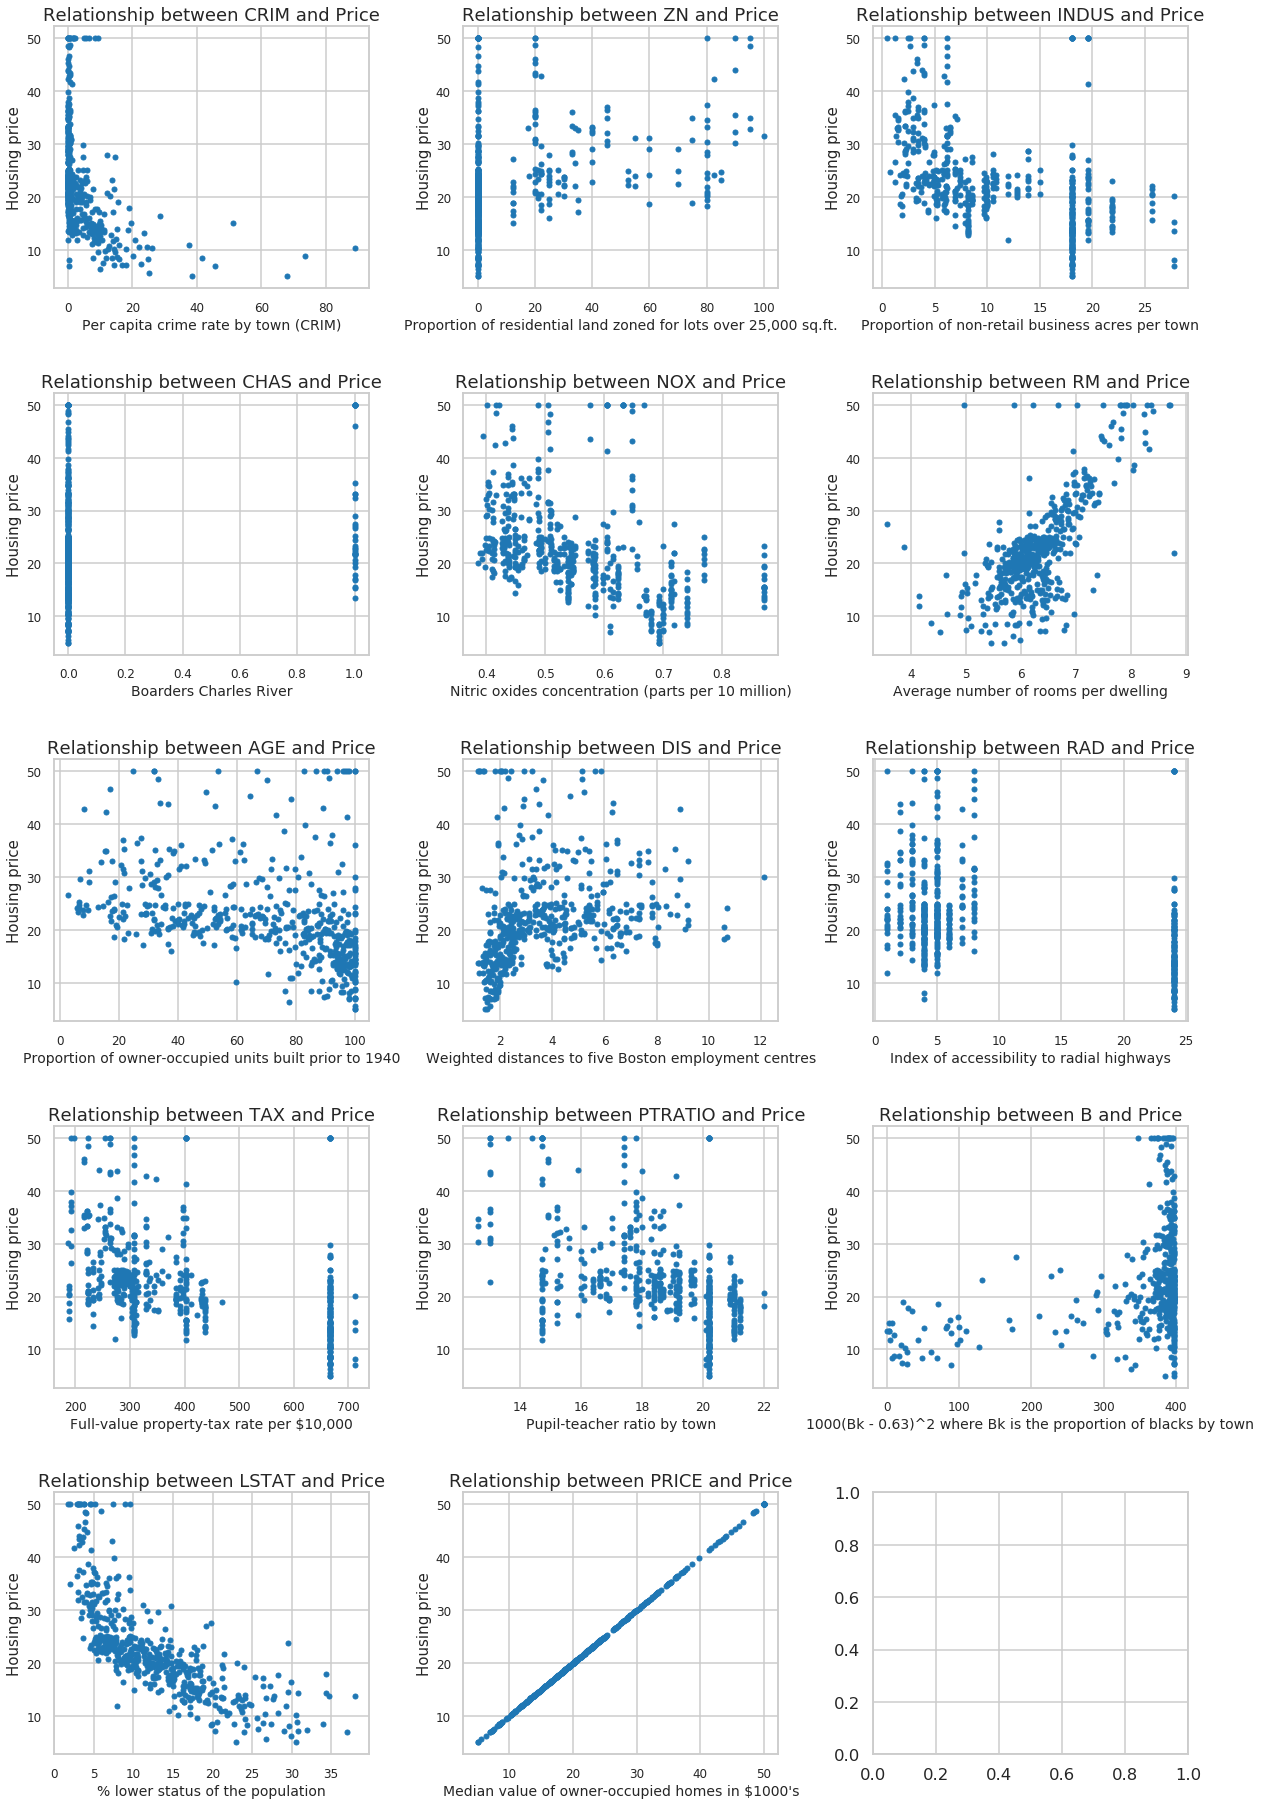

In [16]:
# your turn: create some other scatter plots

left  = 0.125  # the left side of the subplots of the figure
right = 0.65   # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.4   # the amount of height reserved for white space between subplots

fig_rows = 5
fig_cols = 3
plot_height = 30
plot_width = 30

plot_locations = [
    (0,0),(0,1),(0,2),
    (1,0),(1,1),(1,2),
    (2,0),(2,1),(2,2),
    (3,0),(3,1),(3,2),
    (4,0),(4,1)
]

plot_titles = [
    'Relationship between CRIM and Price',    # per capita crime rate by town
    'Relationship between ZN and Price',      # proportion of residential land zoned for lots over 25,000 sq.ft.
    'Relationship between INDUS and Price',   # proportion of non-retail business acres per town
    'Relationship between CHAS and Price',    # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'Relationship between NOX and Price',     # nitric oxides concentration (parts per 10 million)
    'Relationship between RM and Price',      # average number of rooms per dwelling
    'Relationship between AGE and Price',     # proportion of owner-occupied units built prior to 1940
    'Relationship between DIS and Price',     # weighted distances to five Boston employment centres
    'Relationship between RAD and Price',     # index of accessibility to radial highways
    'Relationship between TAX and Price',     # full-value property-tax rate per $10,000
    'Relationship between PTRATIO and Price', # pupil-teacher ratio by town
    'Relationship between B and Price',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'Relationship between LSTAT and Price',   # % lower status of the population
    'Relationship between PRICE and Price'    # Median value of owner-occupied homes in $10,000's
]

data_types = [
    'CRIM',    # per capita crime rate by town
    'ZN',      # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',   # proportion of non-retail business acres per town
    'CHAS',    # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',     # nitric oxides concentration (parts per 10 million)
    'RM',      # average number of rooms per dwelling
    'AGE',     # proportion of owner-occupied units built prior to 1940
    'DIS',     # weighted distances to five Boston employment centres
    'RAD',     # index of accessibility to radial highways
    'TAX',     # full-value property-tax rate per $10,000
    'PTRATIO', # pupil-teacher ratio by town
    'B',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',   # % lower status of the population
    'PRICE',   # Median value of owner-occupied homes in $10,000's
]

variable_labels = [
    'Per capita crime rate by town (CRIM)',
    'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'Proportion of non-retail business acres per town',
    'Boarders Charles River',
    'Nitric oxides concentration (parts per 10 million)',
    'Average number of rooms per dwelling',
    'Proportion of owner-occupied units built prior to 1940',
    'Weighted distances to five Boston employment centres',
    'Index of accessibility to radial highways',
    'Full-value property-tax rate per $10,000',
    'Pupil-teacher ratio by town',
    '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    '% lower status of the population',
    'Median value of owner-occupied homes in $1000\'s'
]

def scatterplot(plot_location, xdata, ydata, title, xlabel, ylabel):

    ax[plot_location].plot(xdata, ydata, 'o', markersize=5)
    ax[plot_location].tick_params(labelsize=12)
    ax[plot_location].set_title(title, fontsize=18)
    ax[plot_location].set_xlabel(xlabel, fontsize=14)
    ax[plot_location].set_ylabel(ylabel, fontsize=15)
    ax[plot_location].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    
    return ax
    
xlabels = variable_labels
ylabels = ['Housing price'] * len(xlabels)

fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(plot_width, plot_height))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

ydata = bos.PRICE

for i in range(len(plot_locations)):
    xdata = bos[data_types[i]]
    ax[plot_locations[i]] = scatterplot(plot_locations[i], xdata, ydata, plot_titles[i], xlabels[i], ylabels[i])
    
plt.show()

A few interesting general observations about the data above:
1. Their is a mix of categorical and continuous variables. For example, CHAS (boarders Charles River) and RAD (radial highway accessibility) are clearly quantized and can only assume discreet values. Other variables such as LSTAT (% lower status of the population) or RM (average number of rooms) appear to be continuous.
2. Some of the variables have very different ranges. For example: ZN (proportion of residential land zoned for lots over 25,000 sq.ft. varies) between 0 and 1000 while NOX (Nitric oxides concentration) varies between approximately 0.4 and 0.8.
3. There is no single variable which is perfectly correlated with prices across the whole dataset.
4. We have several variables which are correlated with price and could be good features to include in our multiple linear regression.

Some specific observations:
1. LSTAT is not a linear function of house price and should likely be excluded from linear regression models or subjected to some type of transformation first.
2. BK does not look like a good candidate for regression because it does not seem to have a clear relationship with price. At high values of BK, home prices are highly variable and span the whole range of the data set. At values of BK less than approximately 350 house prices are low but BK no longer has any effect.

Three variables in addition to CRIM, PTRATIO and RM which are good candidate features for linear regression are: NOX and DIS and AGE. All three appear to have a somewhat linear relationship to price and cover a good range of values.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

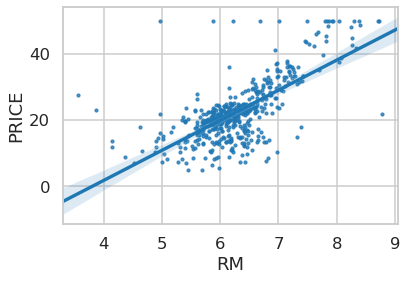

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg=True, scatter_kws={'s':10})

### Histograms
***


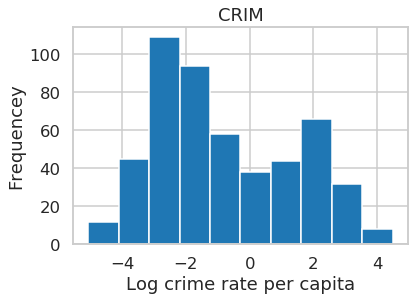

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Log crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>1) Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>2) Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

### 1) Log vs linear histogram

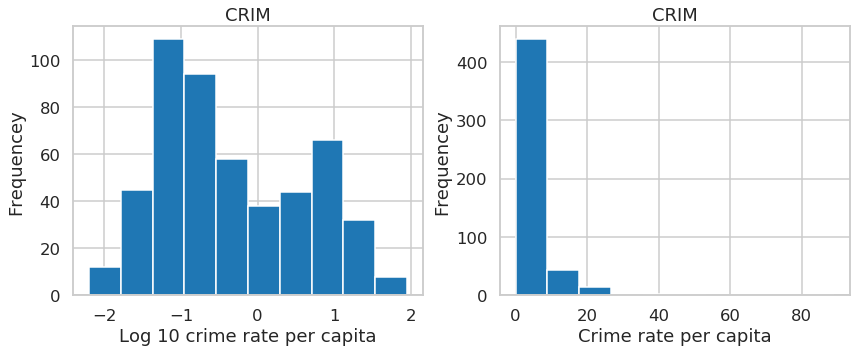

In [19]:
#your turn

plt.subplots(1,2,figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(np.log10(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Log 10 crime rate per capita")
plt.ylabel("Frequencey")

plt.subplot(1, 2, 2)
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")

plt.tight_layout()
plt.show()

Crime rate varies over several orders of magnitude (~0.006 - 89). This makes plotting on a linear axis impractical. Crime rate appears to be bimodal - a characteristic which is clearly visible in the log plot but not in the linear plot.

### 2) Correlations between features
Did the second exercise above meant to ask for a scatter plot? Not sure how to look for a correlation between variables with a histogram. Let's make pairwise scatter plots for RM, PTRATIO, NOX, DIS and CRIM.

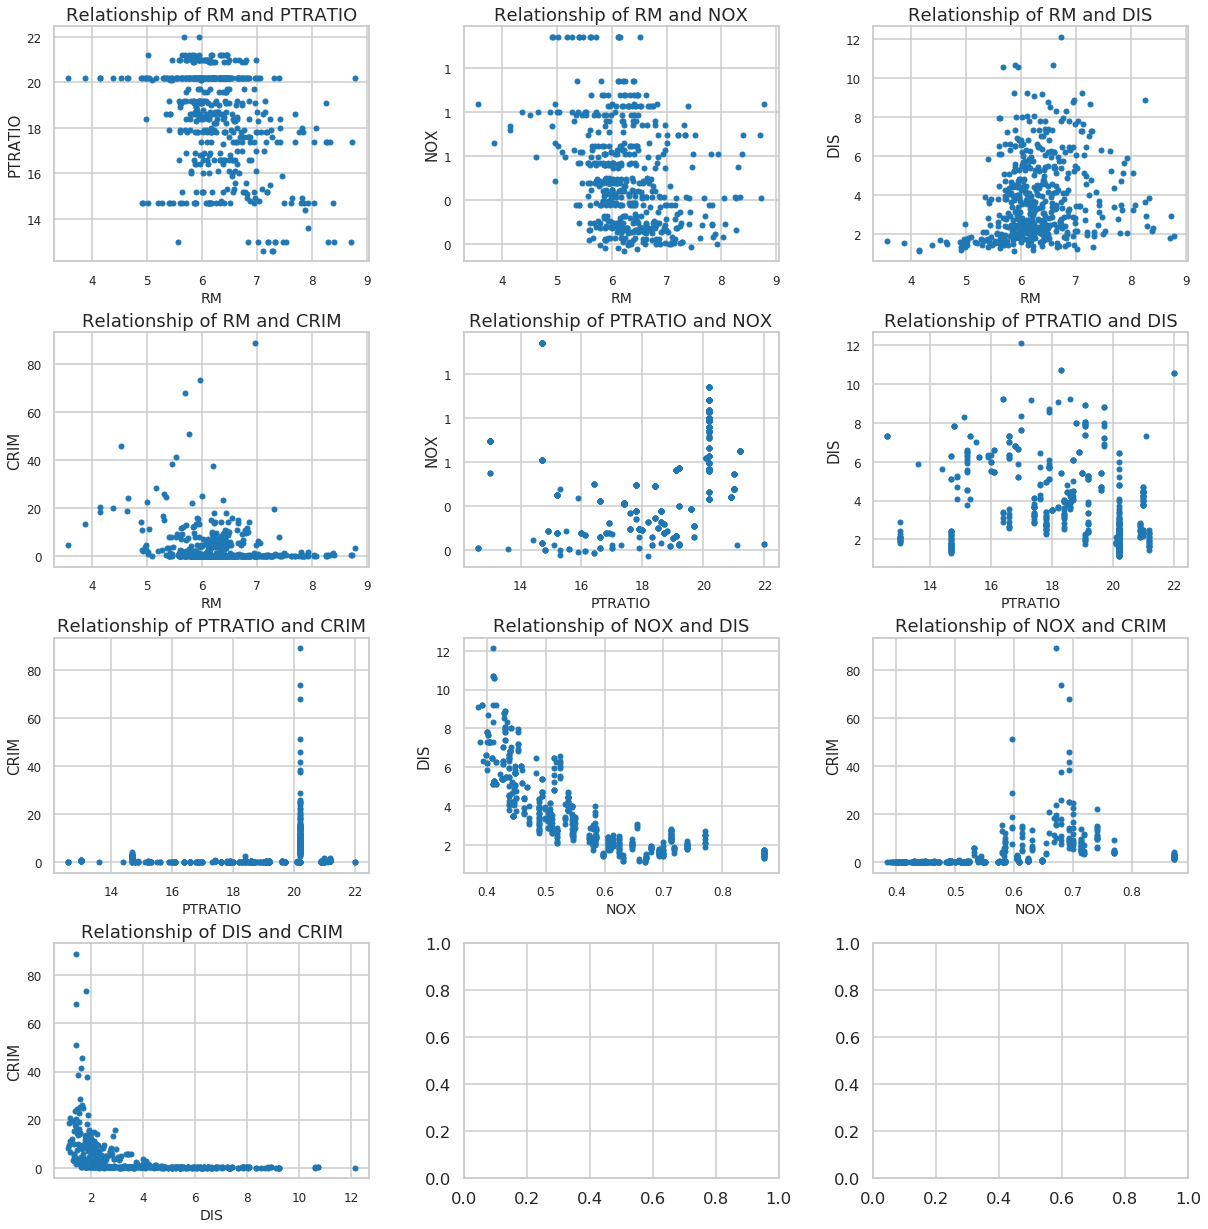

In [20]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.65   # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig_rows = 4
fig_cols = 3
plot_height = 20
plot_width = 30

plot_locations = [
    (0,0),(0,1),(0,2),
    (1,0),(1,1),(1,2),
    (2,0),(2,1),(2,2),
    (3,0)
]

plot_titles = [
    'Relationship of RM and PTRATIO',
    'Relationship of RM and NOX',
    'Relationship of RM and DIS',
    'Relationship of RM and CRIM',
    'Relationship of PTRATIO and NOX',
    'Relationship of PTRATIO and DIS',
    'Relationship of PTRATIO and CRIM',
    'Relationship of NOX and DIS',
    'Relationship of NOX and CRIM',
    'Relationship of DIS and CRIM'
]

data_types = [
    ['RM', 'PTRATIO'],
    ['RM', 'NOX'],
    ['RM', 'DIS'],
    ['RM', 'CRIM'],
    ['PTRATIO', 'NOX'],
    ['PTRATIO', 'DIS'],
    ['PTRATIO', 'CRIM'],
    ['NOX', 'DIS'],
    ['NOX', 'CRIM'],
    ['DIS', 'CRIM']
]

fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(plot_width, plot_height))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for i in range(len(plot_locations)):
    xdata = bos[data_types[i][0]]
    ydata = bos[data_types[i][1]]
    xlabel = data_types[i][0]
    ylabel = data_types[i][1]
    ax[plot_locations[i]] = scatterplot(plot_locations[i], xdata, ydata, plot_titles[i], xlabel, ylabel)
    
plt.show()

Several of these variables are correlated with each other. Some pairs show a relationship which makes rational sense. For example:
1. The farther a property is from the major employment centers (DIS), the lower the nitric oxide pollution (NOX) level becomes. 
2. The upper left part of the distance (DIS) vs. number of rooms (RM) plot is empty. This is intuitively satisfying, properties with few rooms are found near the employment centers, not farther away. 

Something interesting is happening between pupil teacher ration (PTRATIO) and average crime rate (CRIM) which may warrant further investigation. RM and PTRATIO as well as NOX do not appear to be strongly correlated, making them good candidate features for linear regression. The same is true of PTRATIO with DIS and NOX.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           2.49e-74
Time:                        12:02:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>1) Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

### 1) Predicted vs actual prices

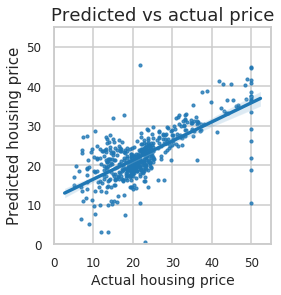

In [23]:
# your turn
ax = sns.regplot(y=m.fittedvalues, x=bos.PRICE, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual price', fontsize=18)
ax.set_xlabel('Actual housing price', fontsize=14)
ax.set_ylabel('Predicted housing price', fontsize=15)
ax.set_xlim(0, 55)
ax.set_ylim(0, 55)
ax.set_aspect('equal', 'box')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Predicted and actual price seems like they have a strong positive correlation. But, there are a few problems:
1. The '>=50' house prices from the orignal data are an issue. The model predicts widely varying prices for these homes. 
2. We appear to be consitently over predicting at low prices and underpredicting at high prices. 
3. If we ignore the '>=50' points, the residuals seem to be an inverse function of actual house price - there is more varibility in predictions at low prices than high prices. 

### Fitting Linear Regression using `sklearn`

In [24]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [25]:
# Look inside lm object
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>1) Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>2) Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>3) Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


**1)** To exclude the intercept term from the model 'fit_intercept' should be set to FALSE. I would include the intercept term in this case. If we exclude the intercept term we are effectively forcing the regression line through the origin. In this case it is not clear that doing so is appropriate. In fact, I would argue that it is not - even the house with the lowest value is not worth zero. I would only exclude the intercept in a case where it makes physical or logical sense. For example: density data. If a sample of material has zero mass it must also have zero volume. In that case (0, 0) is a logically valid and physically necessary point because of the data type.

**2)** No. If our model is doing well the fit residuals should be the result of random variations due to things like measurement error. If this is the case those residuals will be normally distributed with a mean of zero, i.e. the model over and under predicts to the same extent and frequency. If the residuals are not normally distributed and or have a mean other than zero something must be wrong with the model.

**3)** No. The normality assumption only applies to the residuals. The data itself need not be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [27]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508971


In [28]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [29]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [30]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>1) Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>2) Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>3) Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

### 1) Predicted price histogram

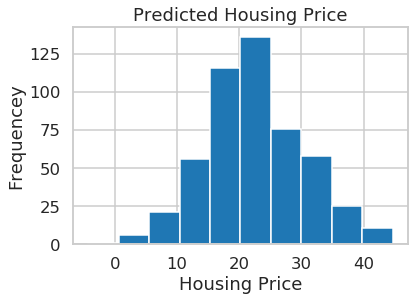

In [31]:
# your turn
plt.hist(lm.predict(X))
plt.title("Predicted Housing Price")
plt.xlabel("Housing Price")
plt.ylabel("Frequencey")
plt.show()

Overall, the distribution appears to be bell shaped with a slight tail towards higher prices. It is centered on a price of ~20 to 25. I do not see any obvious outliers in the histogram.

### 2) Predicted vs actual price scatter plot

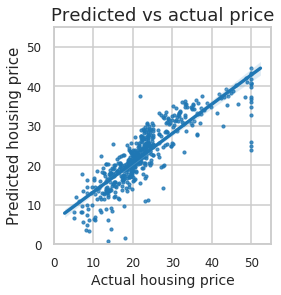

In [32]:
ax = sns.regplot(y=lm.predict(X), x=bos.PRICE, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual price', fontsize=18)
ax.set_xlabel('Actual housing price', fontsize=14)
ax.set_ylabel('Predicted housing price', fontsize=15)
ax.set_xlim(0, 55)
ax.set_ylim(0, 55)
ax.set_aspect('equal', 'box')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

### 3) SciKit-learn vs statsmodels
Both packages are easy to use and provide similar results. Statsmodels has some advantages for linear regression. It makes many fit statistics easily accessible directly from the fitted model. In addition the statsmodels package provides built in diagnostic plots for linear models.

SciKit-learn appears to have done a slightly better job - but we did include all of the features in the dataset whereas for the statsmodels fit we only included price.

The major difference between the two packages is the goal of the implementation. Statsmodels is a classical statistical modeling package which is focused on analyzing and understanding the dataset at hand. This is why the package makes many goodness of fit metrics directly available. SciKit-learn is a machine learning library. It's focus is on model selection and cross validation for the purpose of prediction.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [33]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954975


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [34]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837064525


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>1) Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>2) Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>3) Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>4) Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

### 1) PTRATIO and PRICE

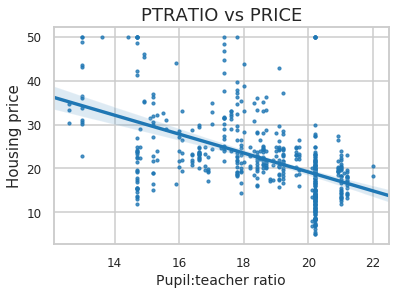

In [35]:
X = bos['PTRATIO'].values.reshape(-1, 1)
Y = bos['PRICE'].values

# This creates a LinearRegression object
PTRATIO_model = LinearRegression()

# Fit using PTRATIO only
PTRATIO_model.fit(X, Y)

ax = sns.regplot(y=Y, x=X, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('PTRATIO vs PRICE', fontsize=18)
ax.set_xlabel('Pupil:teacher ratio', fontsize=14)
ax.set_ylabel('Housing price', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [36]:
print('Estimated intercept coefficient: {}'.format(np.round(PTRATIO_model.intercept_,1)))

Estimated intercept coefficient: 62.3


A y-intercept of ~62 means that as the pupil:teacher ratio approaches zero the expected housing price should be 62.

In [37]:
print('Estimated PTRATIO coefficient: {}'.format(np.round(PTRATIO_model.coef_[0], 2)))

Estimated PTRATIO coefficient: -2.16


The PTRATIO coefficient is the slope of the regression line. A value of ~ -2 means that for an increase of one in the pupil:teacher ratio the housing price decreases by two.

### 2) $R^2$ value

In [38]:
# first calculate resdidual, explained and total sum of squares
RSS = np.sum((bos.PRICE - PTRATIO_model.predict(X)) ** 2)
ESS = np.sum((PTRATIO_model.predict(X) - np.mean(bos.PRICE))**2)
TSS = RSS + ESS

# then get N, K and the corresponding degrees of freedom
K = X.shape[1]
N = len(bos.PRICE)
DFR = N - K - 1
DFr = N - K

print('Residual error degrees of freedom: {}'.format(DFR))
print('Total error degrees of freedom: {}'.format(DFr))

Residual error degrees of freedom: 504
Total error degrees of freedom: 505


In [39]:
# for a sanity check, lets compare our caluclated R_sqr values with the one reported from SciKit-learn
R_sqr = ESS/TSS
R_sqr_adj = 1 - ((RSS / DFR) / (TSS / DFr))
scikit_R_sqr = PTRATIO_model.score(X, bos.PRICE)

print('Calculated R\u00b2: {}'.format(np.round(R_sqr, 3)))
print('Calculated adjusted R\u00b2: {}'.format(np.round(R_sqr_adj, 3)))
print('')
print('SciKit-learn R\u00b2: {}'.format(np.round(scikit_R_sqr, 3)))

Calculated R²: 0.258
Calculated adjusted R²: 0.256

SciKit-learn R²: 0.258


About 26% of the variation in housing price can be explained by pupil:teacher ratio.

### 3) F-statistic

In [40]:
# Same idea here: let's calculate the F-value and then compare to the F-value from statsmodels
MSR = ESS / K
MSE = RSS / (N - K - 1)
F = (MSR / MSE)
statsmodels_F = ols('PRICE ~ PTRATIO',bos).fit().fvalue

print('Calculated F-value: {}'.format(np.round(F, 0)))
print('StatsModels F-value: {}'.format(np.round(statsmodels_F, 0)))

Calculated F-value: 175.0
StatsModels F-value: 175.0


In [41]:
statsmodels_F_stat = ols('PRICE ~ PTRATIO',bos).fit().f_pvalue
print('StatsModels F-statistic: {:0.3e}'.format(statsmodels_F_stat))

StatsModels F-statistic: 1.610e-34


For this application the F-value is the ratio of explained to unexplained variance. In this case a F-value of 175 means that we have 175 times more explained variance than unexplained variance. The extremely small associated F-statistic means we reject the null hypothesis that all model coefficients are equal to zero.

### 4) F-statistic vs t-statistic

In [42]:
# one last time, lets calculate it by hand and then check agains the result provided by statsmodels
std_err = (MSE / sum((bos.PTRATIO - np.mean(bos.PTRATIO))**2))**0.5
t = PTRATIO_model.coef_[0] / std_err

statsmodels_t = ols('PRICE ~ PTRATIO',bos).fit().tvalues[1]

print('Calculated t-value: {}'.format(np.round(t, 1)))
print('StatsModels t-value: {}'.format(np.round(statsmodels_t, 1)))

Calculated t-value: -13.2
StatsModels t-value: -13.2


In [43]:
statsmodels_F_stat = ols('PRICE ~ PTRATIO',bos).fit().f_pvalue
print('StatsModels F-statistic: {:0.3e}'.format(statsmodels_F_stat))

statsmodels_t_stat = ols('PRICE ~ PTRATIO',bos).fit().pvalues[1]
print('StatsModels t-statistic: {:0.3e}'.format(statsmodels_t_stat))

StatsModels F-statistic: 1.610e-34
StatsModels t-statistic: 1.610e-34


In the case of a model with only one dependent variable the t and F statistic are the same. This intuitively makes sense: the F-test evaluates whether or not all model coefficients are zero and the t-test assesses whether or not a given parameter is zero. For a single parameter model they are the same thing.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>1) Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>2) Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>3) Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

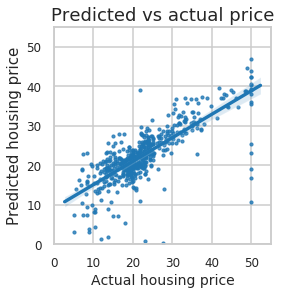

In [44]:
# your turn
X = bos[['CRIM', 'RM', 'PTRATIO']].values
Y = bos['PRICE'].values

# This creates a LinearRegression object
three_feature_model = LinearRegression()

# Fit using three inputs
three_feature_model.fit(X, Y)

ax = sns.regplot(y=three_feature_model.predict(X), x=bos.PRICE, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual price', fontsize=18)
ax.set_xlabel('Actual housing price', fontsize=14)
ax.set_ylabel('Predicted housing price', fontsize=15)
ax.set_xlim(0, 55)
ax.set_ylim(0, 55)
ax.set_aspect('equal', 'box')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

### 1) F-statistic of three feature model

In [45]:
# SciKit-learn does not calucalte F-statistics for us, so use StatsModels
model = 'PRICE ~ CRIM + RM + PTRATIO'
three_feature_statmod_result = ols(model, bos).fit()
statmod_F_val = three_feature_statmod_result.fvalue
statmod_F_stat = three_feature_statmod_result.f_pvalue

print('StatsModels F-value: {}'.format(np.round(statmod_F_val, 0)))
print('StatsModels F-statistic: {:0.3e}'.format(statmod_F_stat))

StatsModels F-value: 245.0
StatsModels F-statistic: 6.150e-98


First glance tells us that our three feature model an improvement over the single feature model in the previous exercise set. We are now explaining 245 times more variance than not. The vanishingly small p-value associated with our F-value allows us to confidently reject the null hypothesis and assume that the true value of at least one of our model coefficients is not zero.

### 2) $R^2$ value of three feature model

In [46]:
# This time we can get the statistic of inrest directly from SciKit-learn using score
scikit_R_sqr = three_feature_model.score(X, bos.PRICE)
print('SciKit-learn R\u00b2: {}'.format(np.round(scikit_R_sqr, 3)))

SciKit-learn R²: 0.594


Our three feature model is also an improvement in terms of $R^2$. We are now explaining almost 60% of the variation in housing price. More than double that explained by the single feature model.

### 3) Significant coefficients of three feature model

In [47]:
# To answer this, we will use statsmodels to run a t-test on each coefficient whith the null hypothesis that
# the true value of that coefficient is zero.
h_nulls = 'CRIM = 0, RM = 0, PTRATIO = 0'
t_test = three_feature_statmod_result.t_test(h_nulls)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.2050      0.032     -6.399      0.000      -0.268      -0.142
c1             7.3804      0.402     18.382      0.000       6.592       8.169
c2            -1.0695      0.133     -8.051      0.000      -1.331      -0.809


Based on the p-value for the t-test we can reject the null hypothesis for each of the three coefficients and accept that all three have nonzero values.
1. <b>CRIM coef. ~ -0.2:</b> Crime rate and housing price are inversely related. When the crime rate increases by one unit, the housing price decreases by 0.2 units. This makes intuitive sense - one would expect houses in dangerous areas to sell for less.
2. <b>RM coef. ~ 7.4:</b> Average rooms per home and price are directly related. When the number of rooms increases by 1 the house price goes up by 7.4. This relationship also is intuitively satisfying.
3. <b>PTRATIO coef. ~ -1.1:</b> Pupil teacher ratio is inversely related to housing price. When the pupil teacher ratio increases by 1 unit the housing price decreases by approximately one unit as well. Pupil teacher ratio is likely to be a good metric for the 'quality' of the schools in the area. The fewer students per class, the better the school and the more desirable and thus expensive the neighborhood.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

This is a computer so.... lets try all possible combinations of 13 or less input features to see if we can beat the 3 feature model from part 3.

In [48]:
import itertools

features = list(bos.drop('PRICE', axis = 1))

feature_subsets = []

for length in range(1, len(features)):
    for subset in itertools.combinations(features, length):
        feature_subsets.append(list(subset))

print('Total possible feature combinations: {}'.format(len(feature_subsets)))

Total possible feature combinations: 8190


Looks like we have 8190 models to run. For each, we will use a pandas DataFrame to store the features used, the adjusted R squared, F-statistic and AIC. We will use the statsmodels package so that these statistics are easily accessible.

In [49]:
models = pd.DataFrame(columns=['features', 'R_sqr_adj', 'F_val', 'AIC'])

Y = bos['PRICE'].values

for i in range(0, len(feature_subsets)):

    features = feature_subsets[i]
    X = bos[features].values
    model = sm.OLS(Y, X)
    results = model.fit()
    
    models = models.append({
        'features': features,
        'R_sqr_adj': results.rsquared_adj,
        'F_val': results.fvalue,
        'AIC': results.aic}, 
        ignore_index=True)
    
    i += 1

In [50]:
models.head()

,features,R_sqr_adj,F_val,AIC
0,[CRIM],0.048202,26.625401,4642.147089
1,[ZN],0.277608,195.450525,4502.600067
2,[INDUS],0.479062,466.324764,4337.169874
3,[CHAS],0.092688,52.691594,4617.926385
4,[NOX],0.762508,1625.598969,3939.708114


In [51]:
models.describe()

,R_sqr_adj,F_val,AIC
count,8190.000000,8190.000000,8190.000000
mean,0.910328,1038.874686,3385.239393
std,0.057449,452.524226,244.276522
min,0.048202,26.625401,3069.067146
25%,0.882795,661.598431,3160.515429
50%,0.924985,1013.064203,3363.473500
75%,0.949637,1334.719832,3587.250006
max,0.958258,4636.712087,4642.147089


Ok, let's take a look at the winner for each: adjusted R<sup>2</sup>, F-value and AIC.

In [52]:
winners = models[models['R_sqr_adj'] == models['R_sqr_adj'].max()]
winners = winners.append(models[models['F_val'] == models['F_val'].max()])
winners = winners.append(models[models['AIC'] == models['AIC'].min()])
winners

,features,R_sqr_adj,F_val,AIC
8150,"[CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRAT...",0.958258,1057.015566,3069.839497
69,"[RM, LSTAT]",0.948248,4636.712087,3169.726639
7967,"[CRIM, ZN, CHAS, RM, DIS, RAD, TAX, PTRATIO, B...",0.958241,1162.122616,3069.067146


Interesting, the winner by F-value is a very simple model with only two features: RM and LSTAT. It's F-value is almost 5 times higher than the other two winners. The adjusted R<sup>2</sup> and AIC winners are very similar - both are larger more complex models with more features.

To finally answer the question, lets compare our three winners back to the three feature model from part 3.

In [53]:
statmod_r_sqr = three_feature_statmod_result.rsquared
statmod_F_val = three_feature_statmod_result.fvalue
statmod_aic = three_feature_statmod_result.aic

print('StatsModels adjusted R\u00b2: {}'.format(np.round(statmod_r_sqr, 3)))
print('StatsModels F-value: {}'.format(np.round(statmod_F_val, 0)))
print('StatsModels AIC: {}'.format(np.round(statmod_aic, 0)))

StatsModels adjusted R²: 0.594
StatsModels F-value: 245.0
StatsModels AIC: 3232.0


Looks like all three new models did a better job than the original three feature model in terms of all metrics. In this case it does not make sense to try and compute an F-test vs our original 3 factor model - our winning model has only two factors, neither of which appeared in the other model!


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>1) Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>2) Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>3) Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>4) Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>5) Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>6) Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

### 1) Residual plot 
Let's start with the model with the best F-value. It is simplest in terms of number of features.

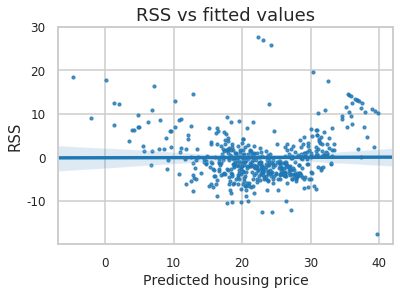

In [54]:
features = models[models['F_val'] == models['F_val'].max()]['features'].tolist()[0]
X = bos[features].values
model = sm.OLS(Y, X)
results = model.fit()

residuals = Y - results.fittedvalues
values = results.fittedvalues

ax = sns.regplot(y=residuals, x=values, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('RSS vs fitted values', fontsize=18)
ax.set_xlabel('Predicted housing price', fontsize=14)
ax.set_ylabel('RSS', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [55]:
results_r_sqr = results.rsquared
results_F_val = results.fvalue
results_aic = results.aic

print('Full dataset adjusted R\u00b2: {}'.format(np.round(results_r_sqr, 3)))
print('Full dataset F-value: {}'.format(np.round(results_F_val, 0)))
print('Full dataset AIC: {}'.format(np.round(results_aic, 0)))

Full dataset adjusted R²: 0.948
Full dataset F-value: 4637.0
Full dataset AIC: 3170.0


Not too bad. The curve looks a bit 'U' shaped. Predictions tend to be high for high and low price houses and low for house prices in the middle. However, there does not seem to be a strong monotonic relationship between RSS and predicted housing price. One small exception to this would be a subset of observations starting with the three highest RSS points. There seems to be a pretty good line of points starting from those three and continuing down and to the right. Those are likely to be houses with price >=50.

### 2) QQ plot

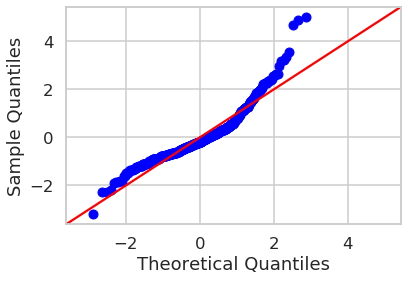

In [56]:
import statsmodels.api as sm
import pylab as py 
from scipy import stats

sm.qqplot(stats.zscore(residuals), line ='45') 
py.show() 

The QQ plot contains some of the same information as the RSS plot but also provides a direct visualization of RSS normality. We can see that we tend to have more large and small RSS values that would be expected of a true normal distribution. We also have fewer 'middle-of-the-road' values than would be expected. Overall the RSS distribution is not perfectly normal - it somewhat squished, with longer tails and a flatter bell shape.

### 3) Residual vs QQ plot
The best plan would include both a residual plot and a QQ plot to make sure they agree. The two plot types also provide complementary information.

**Advantages of residual plot**
1. Will show if the residuals systematically vary as a function of predicted value
2. Slightly more intuitive to interpret
3. Includes every datapoint allowing a good holistic view of the model

**Disadvantages of residual plot**
1. Includes every datapoint - might become cumbersome or hard to interpret as dataset size increases
2. Could be visually challenging to asses overall distribution of residuals

**Advantages of QQ plot**
1. Allows direct visual interpretation of residual normality (key model assumption) 
2. Visually simple and easy to interpret
3. Does not display every point in the dataset - works well for large amounts of data
4. Does not show relationship of residual vs fitted value

**Disadvantages of QQ plot**
1. Possibly less intuitive to interpret
2. Does not include every datapoint -might be hard to spot small numbers of outliers or subtle trends in subsets of the data.

### 4) Outliers
Several groups of outliers are present in the predicted vs actual and residual plots.
1. Looking at the residual plot, there are a small group of low predicted price houses for which the model preforms badly - under predicting the actual prices and leading to large residuals.
2. Also on the residual plot, there are three points with very large residuals. These appear to be part of a subgroup of datapoints which follows a line running downward and to the left. I believe these points are likely to correspond to the >=50 house prices in the dataset.
3. There is one extreme value in the lower right of the plot

### 5) Leverage plot

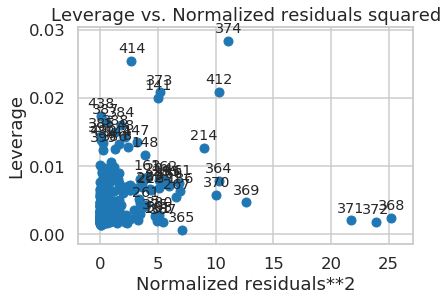

In [57]:
plt.rc('font', size=12)
fig = sm.graphics.plot_leverage_resid2(results)

Let's take a look at some of the high leverage and high residual points and see if we can understand what is going on.

In [58]:
high_leverage = bos.iloc[[374, 414, 373, 412, 141]]
high_leverage

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [59]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


First thing which jumps out is the fact that all of these high leverage points have the max value for age. All but one has the max value for RAD. The LSTAT values are high as well. This seems to indicate that they are older, lower income areas with poor highway accessibility. 

In [60]:
large_residual = bos.iloc[[371, 372, 368]]
large_residual

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0


No surprisingly, the points with the highest residuals all have the thresholded maximum price of 50. These points also have high pupil teacher ratios, poor highway accessibility and are in older areas. Maybe they are beautiful old restored farm houses?

### 6) Clean up data and run regression again, round 1

First step here will be to remove the datapoints with price = 50. This value seems to have been assigned as an artificial cutoff for very expensive houses. This means the model will never be able to handle these values well because the true price is unknown.

In [61]:
bos_cleaned = bos[bos.PRICE < 50]

The model is only fitting based on RM and LSTAT. lets take a look at those two variables again:

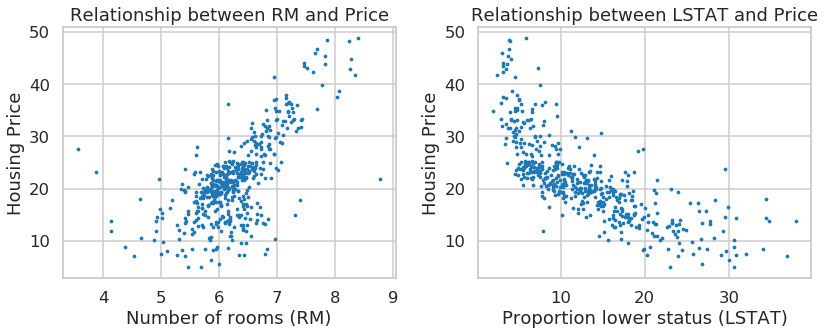

In [62]:
sns.set_context("talk")

plt.subplots(1,2,figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(bos_cleaned.RM, bos_cleaned.PRICE, s=5)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

plt.subplot(1, 2, 2)
plt.scatter(bos_cleaned.LSTAT, bos_cleaned.PRICE, s=5)
plt.xlabel("Proportion lower status (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

plt.tight_layout()
plt.show()

Interesting that LSTAT came out as part of the winning model - initial intuition said not to include it based on the fact that has a nonlinear relationship with price. After removing the >= 50 price points, there are not obvious groups of outliers left. Lets discard the few very high and low average room count datapoints.

In [63]:
bos_cleaned = bos_cleaned[bos_cleaned.RM < 8.6]
bos_cleaned = bos_cleaned[bos_cleaned.RM > 4]

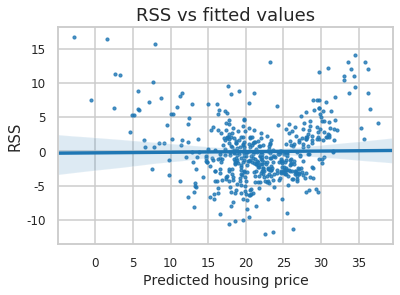

In [64]:
features = models[models['F_val'] == models['F_val'].max()]['features'].tolist()[0]
X_cleaned = bos_cleaned[features].values
Y_cleaned = bos_cleaned['PRICE'].values
model_cleaned = sm.OLS(Y_cleaned, X_cleaned)
results_cleaned = model_cleaned.fit()

residuals_cleaned = Y_cleaned - results_cleaned.fittedvalues
values_cleaned = results_cleaned.fittedvalues

ax = sns.regplot(y=residuals_cleaned, x=values_cleaned, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('RSS vs fitted values', fontsize=18)
ax.set_xlabel('Predicted housing price', fontsize=14)
ax.set_ylabel('RSS', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

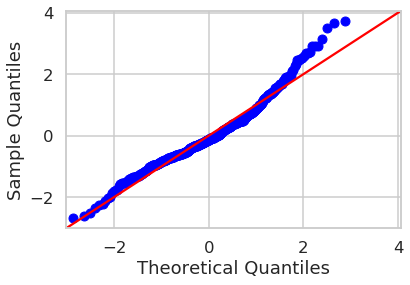

In [65]:
sm.qqplot(stats.zscore(residuals_cleaned), line ='45') 
py.show()

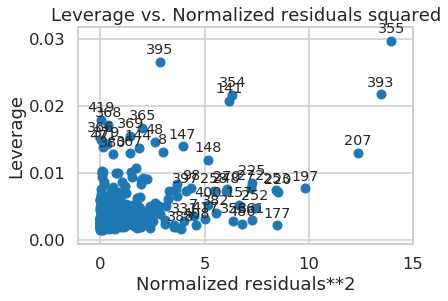

In [66]:
plt.rc('font', size=12)
fig = sm.graphics.plot_leverage_resid2(results_cleaned)

In [67]:
print('Full dataset adjusted R\u00b2: {}'.format(np.round(results_r_sqr, 3)))
print('Full dataset F-value: {}'.format(np.round(results_F_val, 0)))
print('Full dataset AIC: {}'.format(np.round(results_aic, 0)))

cleaned_r_sqr = results_cleaned.rsquared
cleaned_F_val = results_cleaned.fvalue
cleaned_aic = results_cleaned.aic

print('')
print('Cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned_r_sqr, 3)))
print('Cleaned data F-value: {}'.format(np.round(cleaned_F_val, 0)))
print('Cleaned data AIC: {}'.format(np.round(cleaned_aic, 0)))

Full dataset adjusted R²: 0.948
Full dataset F-value: 4637.0
Full dataset AIC: 3170.0

Cleaned data adjusted R²: 0.962
Cleaned data F-value: 6162.0
Cleaned data AIC: 2846.0


Nice improvement, especially in F-value. Last step will be to remove some of the high leverage points by hand and rerun the model one more time.

### Clean up data and run regression again, round 2

In [68]:
bos_cleaned2 = bos_cleaned.drop([355,395,354,393,141])
bos_cleaned2.reset_index(inplace=True)

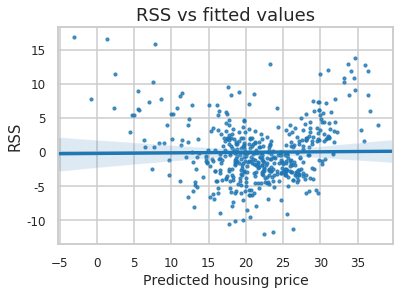

In [69]:
features = models[models['F_val'] == models['F_val'].max()]['features'].tolist()[0]
X_cleaned2 = bos_cleaned2[features].values
Y_cleaned2 = bos_cleaned2['PRICE'].values
model_cleaned2 = sm.OLS(Y_cleaned2, X_cleaned2)
results_cleaned2 = model_cleaned2.fit()

residuals_cleaned2 = Y_cleaned2 - results_cleaned2.fittedvalues
values_cleaned2 = results_cleaned2.fittedvalues

ax = sns.regplot(y=residuals_cleaned2, x=values_cleaned2, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('RSS vs fitted values', fontsize=18)
ax.set_xlabel('Predicted housing price', fontsize=14)
ax.set_ylabel('RSS', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

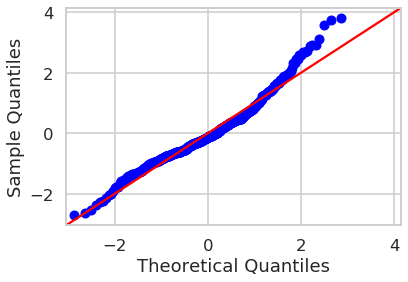

In [70]:
sm.qqplot(stats.zscore(residuals_cleaned2), line ='45') 
py.show()

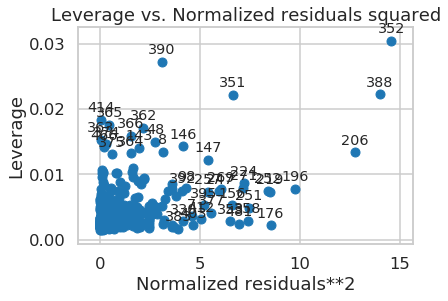

In [71]:
plt.rc('font', size=12)
fig = sm.graphics.plot_leverage_resid2(results_cleaned2)

In [72]:
print('Full dataset adjusted R\u00b2: {}'.format(np.round(results_r_sqr, 3)))
print('Full dataset F-value: {}'.format(np.round(results_F_val, 0)))
print('Full dataset AIC: {}'.format(np.round(results_aic, 0)))

print('')
print('Cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned_r_sqr, 3)))
print('Cleaned data F-value: {}'.format(np.round(cleaned_F_val, 0)))
print('Cleaned data AIC: {}'.format(np.round(cleaned_aic, 0)))

cleaned2_r_sqr = results_cleaned2.rsquared
cleaned2_F_val = results_cleaned2.fvalue
cleaned2_aic = results_cleaned2.aic

print('')
print('Round 2 cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned2_r_sqr, 3)))
print('Round 2 cleaned data F-value: {}'.format(np.round(cleaned2_F_val, 0)))
print('Round 2 cleaned data AIC: {}'.format(np.round(cleaned2_aic, 0)))

Full dataset adjusted R²: 0.948
Full dataset F-value: 4637.0
Full dataset AIC: 3170.0

Cleaned data adjusted R²: 0.962
Cleaned data F-value: 6162.0
Cleaned data AIC: 2846.0

Round 2 cleaned data adjusted R²: 0.963
Round 2 cleaned data F-value: 6227.0
Round 2 cleaned data AIC: 2810.0


Smaller improvement that time, but still an improvement. Looks like diminishing returns. The leverage plot is fascinating - there is now a new set of high leverage points. Just for the sake of experimentation, let's go one more round and remove those by hand as well...

### Clean up data and run regression again, round 3

In [73]:
bos_cleaned3 = bos_cleaned2.drop([352,390,315,380,388,206])
bos_cleaned3.reset_index(inplace=True)

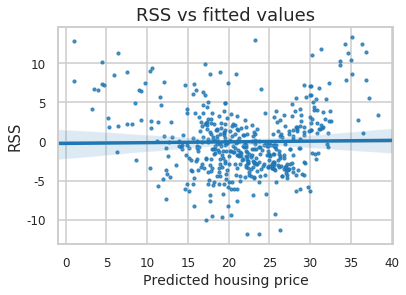

In [74]:
features = models[models['F_val'] == models['F_val'].max()]['features'].tolist()[0]
X_cleaned3 = bos_cleaned3[features].values
Y_cleaned3 = bos_cleaned3['PRICE'].values
model_cleaned3 = sm.OLS(Y_cleaned3, X_cleaned3)
results_cleaned3 = model_cleaned3.fit()

residuals_cleaned3 = Y_cleaned3 - results_cleaned3.fittedvalues
values_cleaned3 = results_cleaned3.fittedvalues

ax = sns.regplot(y=residuals_cleaned3, x=values_cleaned3, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('RSS vs fitted values', fontsize=18)
ax.set_xlabel('Predicted housing price', fontsize=14)
ax.set_ylabel('RSS', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

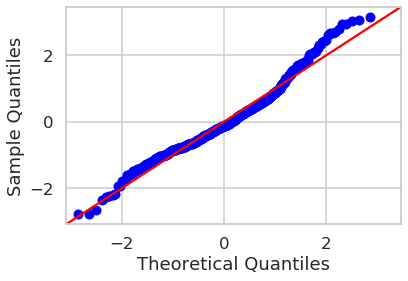

In [75]:
sm.qqplot(stats.zscore(residuals_cleaned3), line ='45') 
py.show()

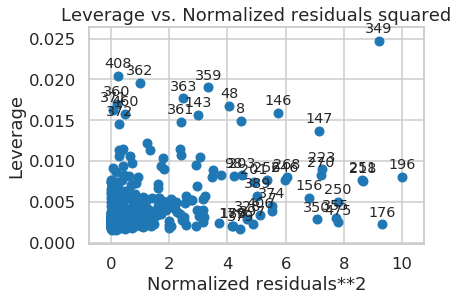

In [76]:
plt.rc('font', size=12)
fig = sm.graphics.plot_leverage_resid2(results_cleaned3)

In [77]:
print('Full dataset adjusted R\u00b2: {}'.format(np.round(results_r_sqr, 3)))
print('Full dataset F-value: {}'.format(np.round(results_F_val, 0)))
print('Full dataset AIC: {}'.format(np.round(results_aic, 0)))

print('')
print('Cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned_r_sqr, 3)))
print('Cleaned data F-value: {}'.format(np.round(cleaned_F_val, 0)))
print('Cleaned data AIC: {}'.format(np.round(cleaned_aic, 0)))

print('')
print('Round 2 cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned2_r_sqr, 3)))
print('Round 2 cleaned data F-value: {}'.format(np.round(cleaned2_F_val, 0)))
print('Round 2 cleaned data AIC: {}'.format(np.round(cleaned2_aic, 0)))

cleaned3_r_sqr = results_cleaned3.rsquared
cleaned3_F_val = results_cleaned3.fvalue
cleaned3_aic = results_cleaned3.aic

print('')
print('Round 3 cleaned data adjusted R\u00b2: {}'.format(np.round(cleaned3_r_sqr, 3)))
print('Round 3 cleaned data F-value: {}'.format(np.round(cleaned3_F_val, 0)))
print('Round 3 cleaned data AIC: {}'.format(np.round(cleaned3_aic, 0)))

Full dataset adjusted R²: 0.948
Full dataset F-value: 4637.0
Full dataset AIC: 3170.0

Cleaned data adjusted R²: 0.962
Cleaned data F-value: 6162.0
Cleaned data AIC: 2846.0

Round 2 cleaned data adjusted R²: 0.963
Round 2 cleaned data F-value: 6227.0
Round 2 cleaned data AIC: 2810.0

Round 3 cleaned data adjusted R²: 0.966
Round 3 cleaned data F-value: 6817.0
Round 3 cleaned data AIC: 2730.0


We obviously could do this forever until - <i>reductio ad absurdum</i> - we are left with only two points and a perfect linear correlation. At some point we need to call it. Lets take a look at the final model.

## Final model

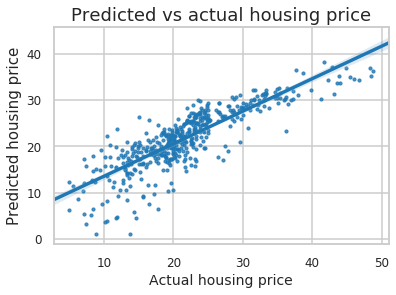

In [78]:
ax = sns.regplot(y=values_cleaned3, x=Y_cleaned3, fit_reg=True, scatter_kws={'s':10})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual housing price', fontsize=18)
ax.set_xlabel('Actual housing price', fontsize=14)
ax.set_ylabel('Predicted housing price', fontsize=15)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [79]:
print(results_cleaned3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              6817.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                        0.00
Time:                        12:03:42   Log-Likelihood:                         -1363.2
No. Observations:                 476   AIC:                                      2730.
Df Residuals:                     474   BIC:                                      2739.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Summary

Features for the initial model were hand selected by inspecting correlation plots. The feature selected were crime rate, number of rooms and pupil teacher ratio. The initial three feature model had adjusted R² = 0.594, F-value = 245.0 and AIC = 3232. To improve the model and automate feature selection, a simple loop was used to evaluate all possible combinations of the 13 features in the dataset. The winning model was selection on the criteria of maximum F-value and was almost a 20 fold improvement over the initial model (F = 4636) and the adjusted R² increased from 0.594 to 0.948.

After feature selection the model was further improved by manual removal of outliers and high leverage observations. This resulted in a visually significant improvement to the standard diagnostic plots. The F-value was further improved another 1.5 fold resulting in a final adjusted R² of 0.966.

The final model is rational and interpretable. It has two insights into housing price to offer:
1. With a coefficient of ~5 average number of rooms is a strong predictor of housing prince. In increase of one room results in a price increase of almost $50,000.
2. Houses are less expensive in lower socioeconomic status areas

There were some problems with the model and the approach:
1. Manual curation of data is cumbersome and impractical
2. Manual curation resulted in the loss of ~5% of the original observations
3. Linear regression may not be the best approach to this dataset - one might imagine that expensive condominiums in Harvard Square follow different rules than suburban family homes. Simple linear regression may be unable to capture this.

The model fit statistics could be improved by further culling of the data. However, this is a slippery slope. By throwing away data to artificially inflate fit metrics, the true variability of the dataset is hidden from the model. This is highly likely to be very detrimental to the models predictive power.

An interesting question to ponder is, 'How much discarded data is too much?'. This question does not have a easy, one-size-fits all answer.
    